In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
plt.style.use("dark_background")

/Users/donnybertucci/practice-brain/andy/fsl/vis/.venv/lib/python3.10/site-packages/numba/cpython/old_hashing.py:477: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)
/Users/donnybertucci/practice-brain/andy/fsl/vis/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
from pathlib import Path
FLANKER_PATH = Path("..", "..", "ds000102").resolve(True)
NUM_SUBS = 26
NUM_RUNS_PER_SUB = 2
NUM_EVS_PER_RUN = 2
TOTAL_RUNS = NUM_RUNS_PER_SUB*NUM_SUBS
EVS = {1: "incongruent", 2: "congruent"}

In [44]:
def iter_betas():
	for i in range(1, NUM_SUBS+1):
		sub = f"sub-{i:02}"
		for j in range(1, NUM_RUNS_PER_SUB+1):
			run = f"run{j}.feat"
			for k in range(1, NUM_EVS_PER_RUN+1):
				betas_filename = f"tstat{k}.nii.gz" # the betas / regressor_error (unexplained variance)
				betas_path = FLANKER_PATH / sub / run / "stats" / betas_filename
				yield betas_path, i, j, k


data = {"incongruent": [], "congruent": []}
for filename, sub_idx, run_idx, betas_idx in iter_betas():
	task = EVS[betas_idx]
	loaded_betas = nib.load(filename).get_fdata()
	data[task].append(loaded_betas) 
	print(task, "Loaded from", filename)

incongruent Loaded from /Users/donnybertucci/practice-brain/andy/ds000102/sub-01/run1.feat/stats/tstat1.nii.gz
congruent Loaded from /Users/donnybertucci/practice-brain/andy/ds000102/sub-01/run1.feat/stats/tstat2.nii.gz
incongruent Loaded from /Users/donnybertucci/practice-brain/andy/ds000102/sub-01/run2.feat/stats/tstat1.nii.gz
congruent Loaded from /Users/donnybertucci/practice-brain/andy/ds000102/sub-01/run2.feat/stats/tstat2.nii.gz
incongruent Loaded from /Users/donnybertucci/practice-brain/andy/ds000102/sub-02/run1.feat/stats/tstat1.nii.gz
congruent Loaded from /Users/donnybertucci/practice-brain/andy/ds000102/sub-02/run1.feat/stats/tstat2.nii.gz
incongruent Loaded from /Users/donnybertucci/practice-brain/andy/ds000102/sub-02/run2.feat/stats/tstat1.nii.gz
congruent Loaded from /Users/donnybertucci/practice-brain/andy/ds000102/sub-02/run2.feat/stats/tstat2.nii.gz
incongruent Loaded from /Users/donnybertucci/practice-brain/andy/ds000102/sub-03/run1.feat/stats/tstat1.nii.gz
congruent

Next I want to create a longer (N, ...) long vector to be transformed via umap

In [60]:
def flatten_data(data: dict[str, list[np.ndarray]]) -> tuple[list[str], np.ndarray]:
	flat_data = []
	labels = []

	for ev in EVS.values():
		for betas in data[ev]:
			labels.append(ev)
			flat_data.append(
				betas.reshape(-1)
			)
	return np.array(labels), np.vstack(flat_data)

labels, flat_data = flatten_data(data)

In [58]:
flat_data_2d = UMAP().fit_transform(flat_data)

/Users/donnybertucci/practice-brain/andy/fsl/vis/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


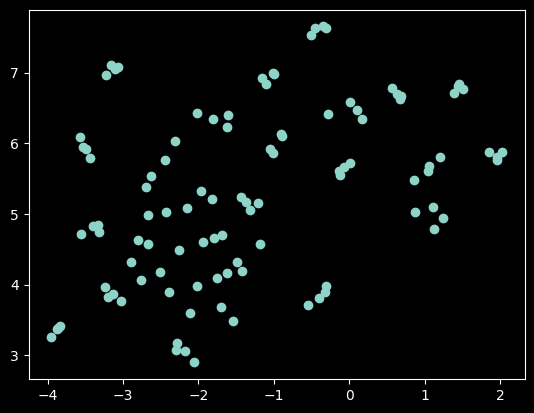

In [ ]:
xs = flat_data_2d[:, 0]
ys = flat_data_2d[:, 1]
plt.scatter(xs, ys)

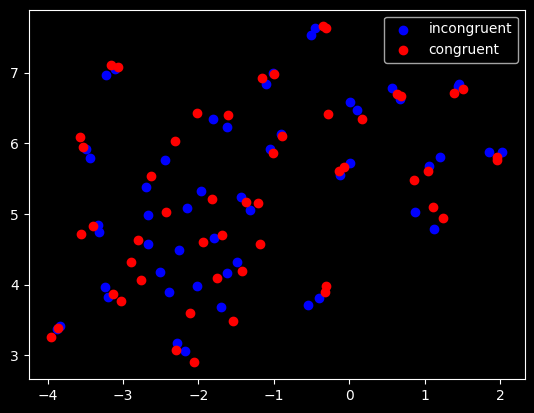

In [66]:
incongruent = labels == "incongruent"
congruent = labels == "congruent"

plt.scatter(xs[incongruent], ys[incongruent], label="incongruent", c="blue")
plt.scatter(xs[congruent], ys[congruent], label="congruent", c="red")
plt.legend()